# Latar Belakang  
Perusahaan Transjakarta ingin meningkatkan pelayanan bagi para penggunanya, terutama bagi pengguna wanita dan lansia. Perlunya layanan dan fasilitas khusus bagi wanita seperti area khusus wanita dalam kendaraan dan juga pada halte bus merupakan upaya untuk meminimalisir tingkat pelecehan seksual yang sering dialami oleh wanita di tempat umum. Lansia pun memerlukan layanan dan fasilitas yang inklusif untuk dapat mempermudah mobilisasi mereka sehari-hari, seperti ramp, tempat duduk khusus, atau *handrail*.

## Pernyataan Masalah
Perusahaan ingin mengetahui **lokasi utama untuk penambahan fasilitas dan layanan khusus, terutama bagi wanita dan lansia**. Informasi ini akan membantu perusahaan untuk memberikan pelayanan yang lebih baik, sehingga berpotensi untuk meningkatkan kepuasan pengguna. Agar lebih efisien, perusahaan ingin memprioritaskan peningkatan pelayanan berupa fasilitas atau pelayanan tambahan pada lokasi-lokasi tertentu terlebih dahulu.

Pertanyaan yang ingin dicoba untuk dijawab pada analisis ini adalah:

**Lokasi mana saja yang perlu diprioritaskan untuk diberi fasilitas dan layanan tambahan, terutama bagi wanita maupun lansia?**

# Data
Untuk menjawab pertanyaan di atas, data yang akan dianalisis adalah data transaksi Transjakarta selama bulan April 2023 yang dapat diakses [di sini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction?datasetId=3434543&source=post_page-----bf0b6b2e5041--------------------------------). 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import cufflinks as cf
cf.go_offline()

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 22 kolom di dalam dataset Transjakarta.csv, yaitu:  

1. transID: Unique transaction id for every transaction
2. payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3. payCardBank: Customers card bank issuer name
4. payCardName: Customers name that is embedded in the card.
5. payCardSex: Customers sex that is embedded in the card
6. payCardBirthDate: Customers birth year
7. corridorID: Corridor ID / Route ID as key for route grouping.
8. corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9. direction: 0 for Go, 1 for Back. Direction of the route.
10. tapInStops: Tap In (entrance) Stops ID for identifying stops name
11. tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12. tapInStopsLat: Latitude of Tap In Stops
13. tapInStopsLon: Longitude of Tap In Stops
14. stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15. tapInTime: Time of tap in. Date and time
16. tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17. tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18. tapOutStopsLat: Latitude of Tap Out Stops
19. tapOutStopsLon: Longitude of Tap Out Stops
20. stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21. tapOutTime: Time of tap out. Date and time
22. payAmount: The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [2]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, perlu diketahui anomali-anomali apa saja yang terdapat di dalam dataset dan perlu ditangani dengan *data cleaning*.

In [3]:
# Gambaran kolom dan jumlah baris dalam dataset Transjakarta
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
pd.set_option('display.max_colwidth', 1)
# Isi masing-masing kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris
* tidak ada anomali tertentu
* selain Transjakarta, data ini juga memuat transaksi dari JakLingko, ditandai dengan `corridorID` yang diawali dengan 'JAK.'
* beberapa kolom, yaitu, `corridorID`, `corridorName`,`tapInStops`,`tapOutStops`,`tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq`,`tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `transID` berisikan id unik untuk setiap transaksi.
* kolom `payCardID`, `direction`, `stopStartSeq`, `stopEndSeq` memiliki data tipe numerik. Dari penjelasannya, kolom ini seharusnya berisikan data object.
* untuk mengetahui usia pengguna, bisa menggunakan tahun lahir pengguna dari kolom `payCardBirthDate`.

### Missing Value

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Secara garis besar:  
* *missing value* tertinggi berada pada kolom `tapOutStops` dengan proporsi 6.03%.
* *missing value* pada kolom `tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`,`stopEndSeq` memiliki jumlah yang sama dan kemungkinan besar berkaitan.
* *missing value* pada kolom `tapInStops` sebesar 3.2%, padahal kolom `tapInStopsName` tidak memiliki *missing value*.

Cara yang akan digunakan untuk menangani *missing value*:
* Pertama, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, seperti mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih  tidak bisa diisi, akan dicoba dengan *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.
* Kedua, menghapus baris/kolom yang berisi *missing value*. Cara ini akan dilakukan pada baris yang tidak dapat diisi berdasarkan baris/kolom lain atau secara statistik.


### Handling Missing values
#### `tapOutStopsName`,`tapOutStopsLat`,`tapOutStopsLon`, dan `stopEndSeq`
Memeriksa apakah baris yang `tapOutStopsName`-nya kosong, `tapOutStopsLat`,`tapOutStopsLon`, dan `stopEndSeq`-nya juga kosong.

In [7]:
df[df['tapOutStopsName'].isnull()][['tapOutStopsLat','tapOutStopsLon', 'stopEndSeq']].value_counts()

Series([], Name: count, dtype: int64)

Terlihat bahwa baris yang `tapOutStopsName`-nya kosong, `tapOutStopsLat`,`tapOutStopsLon`, dan `stopEndSeq`-nya juga kosong. Kemungkinan yang terjadi adalah pengguna tidak melakukan *tap out* dengan kartu yang sama dengan saat *tap in*, dapat dikarenakan kartu rusak, hilang, atau karena alasan lainnya. Karena tidak dapat diisi dengan value lain, maka baris ini akan dihapus.

In [8]:
df.dropna(subset=['tapOutStopsName', 'tapOutStopsLat','tapOutStopsLon', 'stopEndSeq'], how = 'all', inplace = True)

#### `tapOutStops`
Mencoba mengisi `tapOutStops` yang kosong berdasarkan `tapOutStops` dari baris lain yang memiliki `tapOutStopsName` yang sama. Pada `tapOutStops` yang kosong tetapi tidak ada baris lain yang memiliki `tapOutStopsName`yang sama (`tapOutStopsName` hanya memiliki 1 entry), maka tidak dapat diketahui `tapOutStops`-nya. Data seperti ini akan diberi tanda 'not available'.

In [9]:
# Tersisa 945 baris tapOutStops yang masih kosong
display(df[['tapOutStopsName','tapOutStopsLat','tapOutStopsLon', 'stopEndSeq']].isna().sum(),
df[['tapOutStops']].isna().sum())

tapOutStopsName    0
tapOutStopsLat     0
tapOutStopsLon     0
stopEndSeq         0
dtype: int64

tapOutStops    945
dtype: int64

In [10]:
# List 'tapOutStopsName' hanya memiliki 1 entry
s = df['tapOutStopsName'].value_counts()
z= list(s[s==1].index.values)
 
# Memilih data tapOutStops kosong yang tidak memiliki referensi tapOutStops pada baris lain dengan tapOutStopsName yang sama
df.loc[(df['tapOutStops'].isna())&(df['tapOutStopsName'].isin(z))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,...,106.86776,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0
32419,SRCX260G7J04ZB,343897458234312,emoney,Rahayu Prabowo,M,1973,JAK.75,Cililitan - Kp. Pulo,1.0,B03111P,...,106.88373,0,2023-04-09 19:56:07,NaN,Sbr. Jl H Emuntipala I,-6.277035,106.87761,5.0,2023-04-09 20:31:15,0.0
32570,CSCL544U0W09DD,503837878738,flazz,Rahmi Lazuardi,M,1982,JAK.11,Tanah Abang - Kebayoran Lama,1.0,B05102P,...,106.78342,20,2023-04-08 08:55:05,NaN,Sbr. Ps. Pisang,-6.207759,106.79233,25.0,2023-04-08 09:14:01,0.0
32926,FOHO550C4G76FJ,3543024804143004,dki,R. Oni Lailasari,M,1996,JAK.49,Lebak Bulus - Cipulir,0.0,B00479P,...,106.76298,9,2023-04-15 11:36:25,NaN,Exit Tol Veteran Bintaro,-6.262649,106.76654,39.0,2023-04-15 13:04:15,0.0
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,...,106.82746,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0
33424,ONZF587U9M08JU,3536572066357562,dki,Vivi Salahudin,F,1990,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,NaN,...,106.91742,1,2023-04-22 15:16:20,NaN,Masjid Al Waqof,-6.110646,106.91733,2.0,2023-04-22 15:54:34,0.0
33550,MZTM966E6Y39AS,4384998305312935092,brizzi,Oni Uwais,M,2003,JAK.20,Cawang UKI - Lubang Buaya,1.0,B05153P,...,106.87725,18,2023-04-23 15:11:30,NaN,Sbr. Persada Purnawira Halim,-6.259198,106.88547,30.0,2023-04-23 16:18:37,0.0
33961,POUD123Y3H41XB,4300964686794,online,Ir. Prakosa Maryadi,F,1994,JAK.21,Cililitan - Dwikora,0.0,B01724P,...,106.87224,5,2023-04-23 06:17:27,NaN,Grha Intirub,-6.265216,106.87599,7.0,2023-04-23 08:08:49,0.0
34084,EQOM074W9Q50QT,3523501988176433,dki,Eli Mangunsong,F,2001,JAK.64,Lenteng Agung - Aseli,1.0,B00785P,...,106.83300,13,2023-04-23 21:26:34,NaN,Jln. Timbul III,-6.350411,106.80329,32.0,2023-04-23 22:53:38,0.0
34120,PPYB425L2N60NU,564493024850,flazz,"drg. Pranata Sihotang, M.Farm",F,1993,JAK.46,Pasar Minggu - Jagakarsa,0.0,B02101P,...,106.82626,21,2023-04-30 17:00:40,NaN,SMAN 28,-6.286109,106.83318,30.0,2023-04-30 18:05:06,0.0


In [11]:
# Mengisi 'not available' pada data tapOutStops kosong yang tidak memiliki referensi tapOutStops pada baris lain dengan tapOutStopsName yang sama
df.loc[(df['tapOutStops'].isna())&(df['tapOutStopsName'].isin(z)),'tapOutStops']='Not Available'
df['tapOutStops'].isna().sum()

926

Tersisa 926 `tapOutStops` kosong, yang akan diisi dengan value berdasarkan `tapOutStopsName'

In [12]:
# Mengurutkan data berdasarkan tapOutStopsName, kemudian tapOutStops
df.sort_values(['tapOutStopsName','tapOutStops'], inplace = True)

In [13]:
# Mengisi tapOutStops dengan forward fill
df.loc[:,'tapOutStops'] = df.loc[:,'tapOutStops'].ffill()
print(df['tapOutStops'].isna().sum()) #sudah tidak ada lagi tapOutStops yang kosong.
df

0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32867,HSFE028O9S13RL,348989346338960,emoney,R. Pranawa Pranowo,F,2012,6H,Senen - Lebak Bulus,0.0,B05815P,...,106.834960,12,2023-04-16 13:37:09,B00002P,ABA,-6.194149,106.839390,15.0,2023-04-16 15:33:06,3500.0
33896,WIHX679Z5G06HF,180042539226476,emoney,Slamet Gunarto,M,1967,6H,Senen - Lebak Bulus,0.0,P00006,...,106.840230,2,2023-04-22 08:59:58,B00002P,ABA,-6.194149,106.839390,15.0,2023-04-22 09:41:43,3500.0
32780,HADE221I3C32CU,4692797186209751,dki,"Cut Ina Laksita, S.Pt",M,2004,D21,Universitas Indonesia - Lebak Bulus,1.0,B00251P,...,106.815190,11,2023-04-15 05:12:44,B00004P,ACC Simatupang,-6.304475,106.848580,20.0,2023-04-15 06:45:53,3500.0
33445,HIMW091Z8N43NG,377219934316440,emoney,Nurul Rajata,M,1986,D11,Depok - BKN,1.0,B00420P,...,106.829200,8,2023-04-23 19:11:12,B00005P,ACE Hardware,-6.387532,106.827380,9.0,2023-04-23 21:05:53,3500.0
34362,IRKH174W5M28MY,5530470482508325,dki,Jamalia Lestari,F,2003,S21,Ciputat - CSW,0.0,B01433P,...,106.762110,8,2023-04-29 15:17:29,P00004,ASEAN,-6.239889,106.798970,30.0,2023-04-29 15:51:13,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27663,VGZV900P4E52ML,6594038151360079,dki,Darijan Wijaya,M,1998,2E,Rusun Rawa Bebek - Kodamar,0.0,B03003P,...,106.892419,28,2023-04-24 20:42:43,B05935P,Yos Sudarso Kodamar 2,-6.162096,106.881817,31.0,2023-04-24 21:55:30,0.0
29663,AIGY855N3U98JM,6594038151360079,dki,Darijan Wijaya,M,1998,2E,Rusun Rawa Bebek - Kodamar,0.0,B03003P,...,106.892419,28,2023-04-26 18:36:41,B05935P,Yos Sudarso Kodamar 2,-6.162096,106.881817,31.0,2023-04-26 19:59:54,0.0
30663,XPHS629J3Q22IC,6594038151360079,dki,Darijan Wijaya,M,1998,2E,Rusun Rawa Bebek - Kodamar,0.0,B03003P,...,106.892419,28,2023-04-27 20:18:57,B05935P,Yos Sudarso Kodamar 2,-6.162096,106.881817,31.0,2023-04-27 22:10:00,0.0
31663,UGOC925Q1U85TW,6594038151360079,dki,Darijan Wijaya,M,1998,2E,Rusun Rawa Bebek - Kodamar,0.0,B03003P,...,106.892419,28,2023-04-28 18:02:16,B05935P,Yos Sudarso Kodamar 2,-6.162096,106.881817,31.0,2023-04-28 19:38:07,0.0


#### `tapInStops`
Mencoba mengisi `tapInStops` yang kosong berdasarkan `tapInStops` dari baris lain yang memiliki `tapInStopsName` yang sama. Pada `tapInStops` yang kosong tetapi tidak ada baris lain yang memiliki `tapInStopsName`yang sama (`tapInStopsName` hanya memiliki 1 entry), maka tidak dapat diketahui `tapInStops`-nya. Data seperti ini akan diberi tanda 'not available'.

In [14]:
# Tersisa 1177 baris tapInStops yang masih kosong
df[['tapInStops']].isna().sum()

tapInStops    1177
dtype: int64

In [15]:
# List 'tapInStopsName' yang hanya memiliki 1 entry
a = df['tapInStopsName'].value_counts()
y= list(a[a==1].index.values)

# Memilih data tapInStops kosong yang tidak memiliki referensi tapInStops pada baris lain dengan tapInStopsName yang sama
df.loc[(df['tapInStops'].isna())&(df['tapInStopsName'].isin(y))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,...,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
33093,PSIS658K4H51NE,3549492311838172,dki,T. Harimurti Mangunsong,M,1952,JAK.99,Term. Pulo Gadung - Lampiri,0.0,NaN,...,106.922874,16,2023-04-16 09:11:52,B00284P,Curug Kalimalang,-6.247740,106.924540,29.0,2023-04-16 10:57:46,0.0
33364,DMGY817Y4T47VA,3595557073549879,dki,"Hasan Hassanah, S.E.I",F,2001,JAK.50,Kalideres - Puri Kembangan,1.0,NaN,...,106.711980,33,2023-04-16 18:04:28,B00288P,Daarus Saada Duri Kosambi,-6.176932,106.707900,35.0,2023-04-16 19:40:16,0.0
32663,DKJP886D8B30GD,4225751347437323699,brizzi,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,...,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
33296,BQLB235V6Q56LO,4456609130359051,dki,R.M. Irwan Pratama,F,1981,JAK.120,JIS - Terminal Muara Angke,1.0,NaN,...,106.773490,0,2023-04-16 05:17:48,B00592P,Gedong Panjang 2,-6.132546,106.806060,12.0,2023-04-16 06:48:15,0.0
33665,BCDQ521A4M45CL,4577386103603,online,Harjasa Haryanto,M,1968,JAK.15,Bulak Turi - Tanjung Priok,1.0,NaN,...,106.917710,14,2023-04-23 17:38:01,B00525P,Gg. Oxport Kebantenan VII,-6.110279,106.929410,25.0,2023-04-23 19:25:25,0.0
33300,WODC066S7H56UP,213137428120839,emoney,Rafi Novitasari,M,2003,JAK.53,Grogol - Pos Pengumben via Slipi,1.0,NaN,...,106.784410,57,2023-04-16 15:07:53,B00937P,Jln. Bima Kemanggisan,-6.185818,106.787280,59.0,2023-04-16 17:04:03,0.0
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,...,106.769350,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.764670,70.0,2023-04-09 19:42:22,0.0
33420,KLOZ033B6R33FQ,564493024850,flazz,"drg. Pranata Sihotang, M.Farm",F,1993,JAK.32,Lebak Bulus - Petukangan,0.0,NaN,...,106.754880,35,2023-04-23 21:49:30,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.751900,39.0,2023-04-23 22:12:54,0.0
37748,SQHL306H9O39FH,3524515394620452,dki,Titi Safitri,F,2005,6T,Pasar Minggu - Velbak,0.0,NaN,...,106.793862,37,2023-04-20 17:23:29,B06736P,Jln. Pakubuwono VI,-6.239586,106.786544,41.0,2023-04-20 19:37:03,3500.0


In [16]:
# Mengisi 'not available' pada data tapInStops kosong yang tidak memiliki referensi tapInStops pada baris lain dengan tapInStopsName yang sama
df.loc[(df['tapInStops'].isna())&(df['tapInStopsName'].isin(y)),'tapInStops']='Not Available'
df['tapInStops'].isna().sum()

1147

Tersisa 1147 `tapInStops` kosong, yang akan diisi dengan value berdasarkan `tapInStopsName'

In [17]:
# Mengurutkan data berdasarkan tapInStopsName, kemudian tapInStops
df.sort_values(['tapInStopsName','tapInStops'], inplace = True)

In [18]:
# Mengisi tapInStops dengan forward fill
df.loc[:,'tapInStops'] = df.loc[:,'tapInStops'].ffill()
print(df['tapInStops'].isna().sum()) #sudah tidak ada lagi tapInStops yang kosong.
df

0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
630,FWSM920W3Y61BT,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-04 05:29:20,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-04 06:19:00,0.0
1230,HAXZ269V4O55JL,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-05 06:49:10,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-05 07:12:08,0.0
1830,PUOU636M4L22VV,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-06 06:03:49,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-06 06:50:03,0.0
2430,XNPM433A8R12DU,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-07 06:31:21,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-07 06:59:48,0.0
3030,YETM164Y9C45EC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-10 06:05:10,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-10 06:50:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29729,JTKD427M4L70ON,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-26 20:50:04,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-26 22:21:25,0.0
30729,UISB475W1J23YY,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-27 20:53:00,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-27 22:23:45,0.0
31729,CTDD657K2W04RL,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-28 17:42:46,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-28 18:58:25,0.0
15729,MNQZ762M6G48NG,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-06 19:15:04,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-06 20:15:27,0.0


#### `corridorID`
Pada kolom `corridorID` dan `corridorName`, jika keduanya kosong maka tidak dapat ditentukan koridornya, maka akan dihapus. Jika salah satunya kosong, maka dapat diisi berdasarkan baris lain yang memiliki `corridorID`/`corridorName` yang sama.

In [19]:
# Menghapus row yang tidak dapat diketahui koridornya
df.dropna(subset=['corridorID','corridorName'], how = 'all', inplace = True)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
630,FWSM920W3Y61BT,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-04 05:29:20,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-04 06:19:00,0.0
1230,HAXZ269V4O55JL,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-05 06:49:10,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-05 07:12:08,0.0
1830,PUOU636M4L22VV,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-06 06:03:49,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-06 06:50:03,0.0
2430,XNPM433A8R12DU,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-07 06:31:21,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-07 06:59:48,0.0
3030,YETM164Y9C45EC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-10 06:05:10,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-10 06:50:20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29729,JTKD427M4L70ON,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-26 20:50:04,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-26 22:21:25,0.0
30729,UISB475W1J23YY,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-27 20:53:00,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-27 22:23:45,0.0
31729,CTDD657K2W04RL,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-28 17:42:46,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-28 18:58:25,0.0
15729,MNQZ762M6G48NG,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-06 19:15:04,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-06 20:15:27,0.0


In [20]:
# Tersisa 127 baris corridorID yang masih kosong
df[['corridorID']].isna().sum()

corridorID    127
dtype: int64

In [21]:
# List 'corridorName' yang hanya memiliki 1 entry
d = df['corridorName'].value_counts()

# tidak ada corridorID kosong yang corridorName-nya hanya memiliki 1 entry
x= list(d[d==1].index.values)
df.loc[(df['corridorID'].isna())&(df['corridorName'].isin(x))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [22]:
# Mengurutkan data berdasarkan corridorName
df.sort_values(['corridorName','corridorID'], inplace = True)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
34531,PRGC757X9I05ET,180089739884224,emoney,Mustika Rajasa,M,1982,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,B00044P,...,106.80338,3,2023-04-30 18:31:20,B06830P,SPBU Jagakarsa,-6.329435,106.825314,24.0,2023-04-30 19:30:29,0.0
241,KLJX380M8M22TJ,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,...,106.80356,35,2023-04-03 05:09:21,B00042P,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-03 05:33:28,0.0
841,WWHS316A5J97PJ,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,...,106.80356,35,2023-04-04 05:44:49,B00042P,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-04 06:27:37,0.0
1441,BEWC004L3S24NL,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,...,106.80356,35,2023-04-05 06:22:42,B00042P,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-05 06:59:59,0.0
2041,DUIO642F7C91VV,3561570507349808,dki,"KH. Oskar Megantara, S.I.Kom",F,2001,JAK.44,Andara - Stasiun Universitas Pancasila,1.0,B00045P,...,106.80356,35,2023-04-06 06:11:02,B00042P,Andara Margasatwa 1,-6.313471,106.803690,36.0,2023-04-06 06:50:24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17807,NOLT876N8J77BQ,3591995490629201,dki,Luis Mangunsong,M,1984,T11,NaN,1.0,B01157P,...,106.62023,15,2023-04-10 19:22:56,B05676P,Tangerang City 2,-6.194540,106.634750,18.0,2023-04-10 20:25:33,3500.0
20852,OTBJ572J7U28DD,347105556938180,emoney,Agnes Oktaviani,F,1993,T11,NaN,1.0,P00217,...,106.80841,2,2023-04-13 21:30:34,P00226,Slipi Kemanggisan Arah Utara,-6.189906,106.796940,4.0,2023-04-13 23:11:51,3500.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.618070,14.0,2023-04-03 06:09:12,20000.0
4260,IDCU173X8F71EK,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,...,106.80861,3,2023-04-12 06:11:55,B02556P,Palem Semi 1,-6.218812,106.618070,14.0,2023-04-12 06:51:22,20000.0


In [23]:
# Mengisi corridorID
df.loc[:,'corridorID'] = df.loc[:,'corridorID'].ffill()
print(df['corridorID'].isna().sum()) #sudah tidak ada lagi corridorID

0


 #### `corridorName`
 Untuk pengisian *missing value* pada kolom `corridorName`, akan digunakan cara yang sama dengan saat mengisi `corridorID`

In [24]:
# Tersisa 776 baris corridorName yang masih kosong
df[['corridorName']].isna().sum()

corridorName    776
dtype: int64

In [25]:
# List 'corridorID' yang hanya memiliki 1 entry, dan 'corridorName'-nya kosong
f = df['corridorID'].value_counts()
w= list(f[f==1].index.values)
df.loc[(df['corridorName'].isna())&(df['corridorID'].isin(w))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [26]:
# Mengurutkan data berdasarkan corridorID
df.sort_values(['corridorID','corridorName'], inplace = True)

In [27]:
# Mengisi corridorName
df.loc[:,'corridorName'] = df.loc[:,'corridorName'].ffill()
print(df['corridorName'].isna().sum()) #sudah tidak ada lagi corridorName yang kosong

0


#### `payAmount`

In [28]:
# Tersisa 941 baris payAmount yang masih kosong
df[['payAmount']].isna().sum()

payAmount    941
dtype: int64

In [29]:
q = df.groupby('corridorID')['payAmount'].nunique()
q[q>1].count()

0

Diketahui berdasarkan data ini bahwa masing-masing `corridorID` memiliki harga tertentu, tidak ada perbedaan antar pengguna. Maka *missing value* dari `payAmount` dapat diisi sesuai dengan harga pada `corridorID` tersebut.

In [30]:
# Mengurutkan data berdasarkan corridorID, kemudian payAmount
df.sort_values(['corridorID','payAmount'], inplace = True)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
12978,WSAN660P2M07TE,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-03 19:44:51,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-03 21:36:36,3500.0
13978,FPGH946B7N78ZR,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-04 20:34:52,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-04 22:32:18,3500.0
15978,UOFY602Z4N30VK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-06 18:35:11,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-06 20:00:04,3500.0
16978,TWGK210M4H25AK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-07 20:21:30,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-07 21:31:45,3500.0
17978,MTHY595F7J55UK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-10 20:20:31,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-10 21:12:05,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,CHWQ310V0A50GY,4254175641149864,dki,Wasis Napitupulu,M,1999,T21,Palem Semi - Bundaran Senayan,1.0,B05770P,...,106.76760,8,2023-04-29 20:47:28,B01440P,Jln. Palem Jepang Baru,-6.218391,106.61589,13.0,2023-04-29 21:08:12,20000.0
33407,IPVK463J6D33QF,4294956173069779977,brizzi,Tina Saptono,F,1995,T21,Palem Semi - Bundaran Senayan,1.0,B05770P,...,106.76760,8,2023-04-22 08:05:39,B02861P,Plaza Europa,-6.221188,106.61667,11.0,2023-04-22 09:12:31,20000.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
4260,IDCU173X8F71EK,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,...,106.80861,3,2023-04-12 06:11:55,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-12 06:51:22,20000.0


In [31]:
# Mengisi payAmount
df.loc[:,'payAmount'] = df.loc[:,'payAmount'].ffill()
print(df['payAmount'].isna().sum()) #sudah tidak ada lagi payAmount yang kosong

0


### Mengubah Tipe Data

Mengubah `tapInTime` dan `tapOutTime` menjadi datetime.

In [32]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], infer_datetime_format=True)
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], infer_datetime_format=True)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
12978,WSAN660P2M07TE,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-03 19:44:51,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-03 21:36:36,3500.0
13978,FPGH946B7N78ZR,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-04 20:34:52,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-04 22:32:18,3500.0
15978,UOFY602Z4N30VK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-06 18:35:11,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-06 20:00:04,3500.0
16978,TWGK210M4H25AK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-07 20:21:30,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-07 21:31:45,3500.0
17978,MTHY595F7J55UK,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-10 20:20:31,P00010,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-10 21:12:05,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,CHWQ310V0A50GY,4254175641149864,dki,Wasis Napitupulu,M,1999,T21,Palem Semi - Bundaran Senayan,1.0,B05770P,...,106.76760,8,2023-04-29 20:47:28,B01440P,Jln. Palem Jepang Baru,-6.218391,106.61589,13.0,2023-04-29 21:08:12,20000.0
33407,IPVK463J6D33QF,4294956173069779977,brizzi,Tina Saptono,F,1995,T21,Palem Semi - Bundaran Senayan,1.0,B05770P,...,106.76760,8,2023-04-22 08:05:39,B02861P,Plaza Europa,-6.221188,106.61667,11.0,2023-04-22 09:12:31,20000.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
4260,IDCU173X8F71EK,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,...,106.80861,3,2023-04-12 06:11:55,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-12 06:51:22,20000.0


Mengubah `direction`, `payCardID`, `stopStartSeq`, dan `stopEndSeq` menjadi object

In [33]:
df.astype({'direction': str, 'payCardID': str, 'stopStartSeq': str, 'stopEndSeq': str }).dtypes

transID             object        
payCardID           object        
payCardBank         object        
payCardName         object        
payCardSex          object        
payCardBirthDate    int64         
corridorID          object        
corridorName        object        
direction           object        
tapInStops          object        
tapInStopsName      object        
tapInStopsLat       float64       
tapInStopsLon       float64       
stopStartSeq        object        
tapInTime           datetime64[ns]
tapOutStops         object        
tapOutStopsName     object        
tapOutStopsLat      float64       
tapOutStopsLon      float64       
stopEndSeq          object        
tapOutTime          datetime64[ns]
payAmount           float64       
dtype: object

### Menambah Kolom Baru
Untuk mengetahui jumlah pengguna lansia, maka perlu diketahui usia dari pengguna. Menurut Kementerian Kesehatan, lansia adalah individu yang berusia 60 tahun ke atas.

In [34]:
# Menambah kolom usia
df['age'] = df.apply(lambda x : 2023 - x['payCardBirthDate'], axis = 1)

In [35]:
# Menambah kolom golongan usia
def gol(x):
    if x['age'] < 19:
        return 'Anak & Remaja'
    elif x['age'] < 60:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df['golUsia'] = df.apply(gol, axis=1)

Kolom hari dan weekday dapat berguna jika ingin mengetahui jumlah transaksi pada hari-hari tertentu.

In [36]:
# Menambah kolom hari
df['dayOfWeek'] = df['tapInTime'].dt.day_name()

#Menambah kolom weekday
def weekday(x):
    if x['dayOfWeek'] in ['Monday', 'Tuesday', 'Thursday', 'Friday', 'Wednesday']:
        return 'Yes'
    else:
        return 'No'
df['weekday'] = df.apply(weekday, axis = 1)

Kolom paruh waktu yang dibagi setiap 4 jam per harinya dapat membantu melihat jumlah transaksi pada periode-periode tertentu. Seperti misalnya melihat *rush hour*

In [37]:
# Menambah kolom paruh waktu
def quartering(x):
    if x['tapInHour'] < 5:
        return '1'
    elif x['tapInHour'] < 9:
        return '2'
    elif x['tapInHour'] < 13:
        return '3'
    elif x['tapInHour'] < 17:
        return '4'
    elif x['tapInHour'] < 21:
        return '5'
    elif x['tapInHour'] <= 23:
        return '6'

df['tapInHour'] = pd.to_datetime(df['tapInTime'], format='%H:%M').dt.hour
df['tapInHour']= df['tapInHour'].astype(int)
df['timeQuarter'] = df.apply(quartering, axis=1)


Seperti disampaikan di awal, pada data ini termasuk juga transaksi pada JakLingko. Jika ingin menganalisis salah satunya saja, maka kolom `isTJ` dapat membantu memisahkan keduanya.

In [38]:
# Menandai mana yang transJakarta dan JakLingko
def tije(x):
    if x['corridorID'].startswith('JAK'):
        return 'No'
    else:
        return 'Yes'
    
df['isTJ'] = df.apply(tije, axis=1)

### Menghapus Kolom yang Tidak Digunakan Dalam Analisis

In [150]:
df = df.drop(columns = ['transID', 'payCardID', 'payCardBank', 'direction', 'stopStartSeq', 'stopEndSeq', 'payCardName'])

## Data yang sudah bersih
Mengecek kembali data yang sudah dibersihkan

In [151]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(35478, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,payCardSex,object,0,2,"[F, M]"
1,payCardBirthDate,int64,0,67,"[1995, 2009]"
2,corridorID,object,0,221,"[10, JAK.26]"
3,corridorName,object,0,216,"[Rusun Jati Rawasari - Senen, Pondok Labu - Blok M]"
4,tapInStops,object,0,2506,"[B04662P, P00151]"
5,tapInStopsName,object,0,2535,"[Gedong Panjang, Jln. Perjuangan Raya 3]"
6,tapInStopsLat,float64,0,2520,"[-6.150003, -6.244765]"
7,tapInStopsLon,float64,0,2395,"[106.9009, 106.75204]"
8,tapInTime,datetime64[ns],0,34755,"[2023-04-03T19:33:28.000000000, 2023-04-19T17:45:23.000000000]"
9,tapOutStops,object,0,2203,"[B00694P, B00248P]"


In [145]:
df.to_csv('Transjakarta_clean.csv') #untuk digunakan di tableau

Sebelum dibersihkan, ada 37900 baris data, setelah dibersihkan terisa 35478 baris. Sekitar 2400 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis

## Demografi Pengguna
Melihat data keseluruhan

In [152]:
df.describe(include='object') #yang dimasukkan hanya kolom object karena data yang akan dianalisis berasal dari kolom-kolom tsb

,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName,golUsia,dayOfWeek,weekday,timeQuarter,isTJ
count,35478,35478,35478,35478,35478,35478,35478,35478,35478,35478,35478,35478
unique,2,221,216,2506,2535,2203,2220,3,7,2,5,2
top,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN,Dewasa,Friday,Yes,2,Yes
freq,18875,384,384,229,229,302,302,29002,6441,32014,13909,22469


In [159]:
df.describe()

,payCardBirthDate,tapInStopsLat,tapInStopsLon,tapInTime,tapOutStopsLat,tapOutStopsLon,tapOutTime,payAmount,age,tapInHour
count,35478.000000,35478.000000,35478.000000,35478,35478.000000,35478.000000,35478,35478.000000,35478.000000,35478.000000
mean,1990.138706,-6.214865,106.841544,2023-04-16 08:06:47.795056128,-6.214660,106.841230,2023-04-16 09:18:59.164750080,2690.427871,32.861294,12.526185
min,1946.000000,-6.394973,106.614730,2023-04-01 06:22:27,-6.394973,106.614730,2023-04-01 07:27:31,0.000000,11.000000,5.000000
25%,1982.000000,-6.245863,106.803470,2023-04-10 09:03:39.750000128,-6.247225,106.801640,2023-04-10 10:18:08,0.000000,22.000000,7.000000
50%,1990.000000,-6.214587,106.834830,2023-04-16 17:38:01.500000,-6.214787,106.834580,2023-04-16 18:57:45,3500.000000,33.000000,13.000000
75%,2001.000000,-6.175528,106.882620,2023-04-21 21:43:07.750000128,-6.174736,106.883400,2023-04-21 23:14:56.500000,3500.000000,41.000000,17.000000
max,2012.000000,-6.089429,107.023950,2023-04-30 21:55:41,-6.091746,107.023660,2023-04-30 23:23:18,20000.000000,77.000000,21.000000
std,13.034972,0.057870,0.060396,NaN,0.059025,0.061045,NaN,4181.975793,13.034972,5.716827


### Sebaran Usia Penumpang

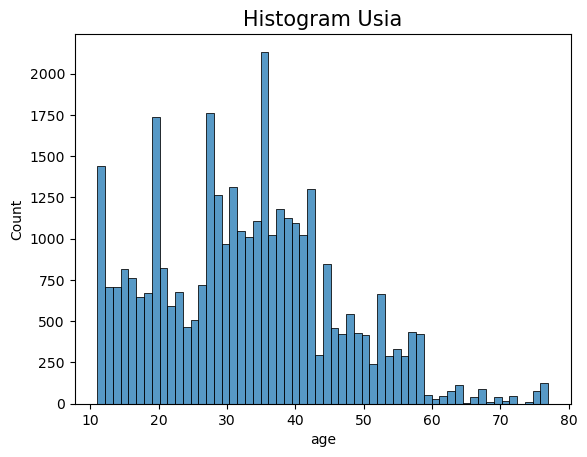

In [42]:
sns.histplot(df['age'])
plt.title('Histogram Usia', size=15)
plt.show()

### Mengetahui sebaran pengguna berdasarkan jenis kelamin

In [43]:
sex = df.groupby('payCardSex').size().reset_index()
sex.rename(columns = {0:'Count'}, inplace = True)
sex

,payCardSex,Count
0,F,18875
1,M,16603


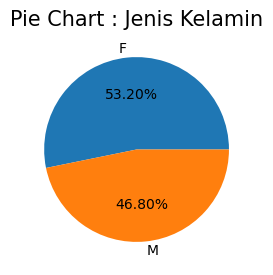

In [157]:
plt.figure(figsize=(10,3))
plt.pie(sex['Count'],labels=sex['payCardSex'],autopct='%.2f%%', textprops={'fontsize': 10})
plt.title('Pie Chart : Jenis Kelamin',size=15)
plt.show()

H0: proporsi transaksi oleh pengguna wanita sama dengan atau kurang dari proporsi transaksi oleh pengguna pria.\
Ha: proporsi transaksi pengguna wanita lebih besar dari proporsi transaksi oleh pengguna pria.
alpha = 0.05

In [160]:
countJK = df[df['payCardSex']=='F']['payCardSex'].count()
tot = df['payCardSex'].count()
z_stat, p_value = proportions_ztest(countWkdy, tot, 0.5, alternative = 'larger')
print('p-value adalah',p_value)

p-value adalah 0.0


p-value < 0.05, maka **proporsi transaksi oleh pengguna wanita lebih besar dibandingkan proporsi transaksi oleh pria**.

### Proporsi Golongan Usia

In [45]:
gol = df.groupby('golUsia').size().reset_index()
gol.rename(columns = {0:'Count'}, inplace = True)
gol

,golUsia,Count
0,Anak & Remaja,5754
1,Dewasa,29002
2,Lansia,722


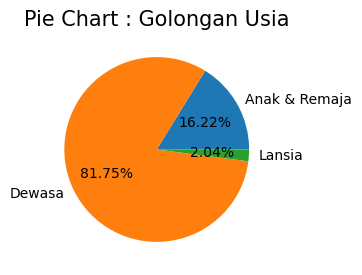

In [156]:
plt.figure(figsize=(10,3))
plt.pie(gol['Count'],labels=gol['golUsia'],autopct='%.2f%%', textprops={'fontsize': 10})
plt.title('Pie Chart : Golongan Usia',size=15)
plt.show()

### Total Transaksi berdasarkan hari

In [47]:
transByDay = df.groupby('dayOfWeek').size().reset_index()
transByDay.rename(columns = {0:'Count'}, inplace = True)
transByDay['dayOfWeek'] = pd.Categorical(transByDay['dayOfWeek'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
transByDay.sort_values(by = 'dayOfWeek')

,dayOfWeek,Count
1,Monday,6393
5,Tuesday,6405
6,Wednesday,6384
4,Thursday,6391
0,Friday,6441
2,Saturday,1711
3,Sunday,1753


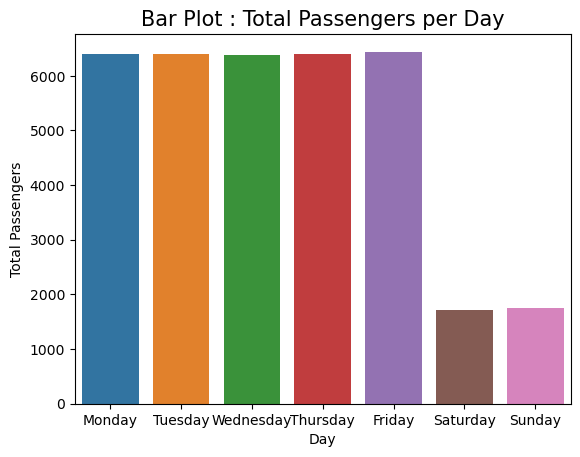

In [48]:
x=transByDay['dayOfWeek'].unique()
y=transByDay['Count']
sns.barplot(x=x,y=y)
plt.title('Bar Plot : Total Passengers per Day',size=15)
plt.xlabel('Day')
plt.ylabel('Total Passengers')
plt.show()

Transaksi terbanyak dilakukan pada hari kerja (Senin-Jumat)

## Mengetahui Lokasi Dengan Transaksi Terbanyak

Lokasi-lokasi dengan transaksi terbanyak perlu diketahui, terutama untuk mengetahui lokasi yang akan menjadi target penambahan fasilitas/layanan bagi pengguna wanita. Banyak pelecehan seksual terjadi saat kondisi halte/kendaraan sedang penuh sehingga semua orang saling berdesakan. Maka perlu diketahui lokasi halte dengan transasksi terbanyak, kemudian dari halte-halte tersebut dicari halte dengan pengguna wanita terbanyak.

### 10 Halte untuk Tap In dan Tap Out Terbanyak oleh Wanita

Analisis dilakukan untuk menjawab pertanyaan: **Halte mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus wanita?**

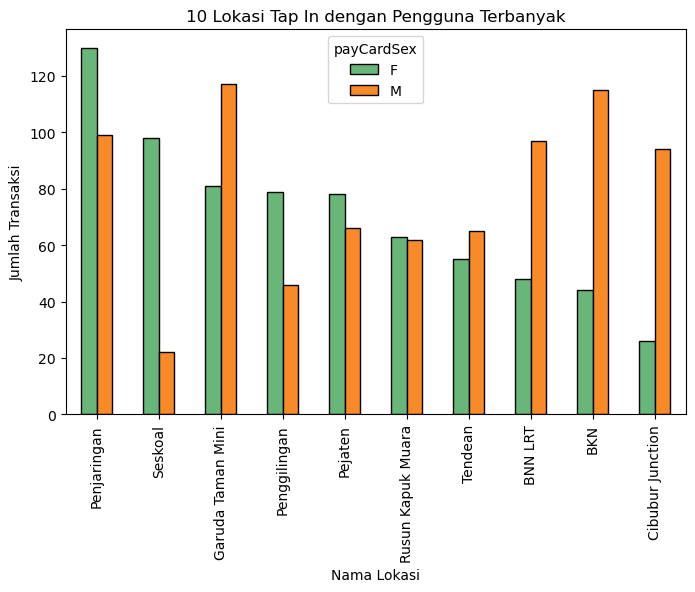

In [99]:
top_InStops = (df['tapInStopsName'].value_counts())
top_10_InStops = top_InStops[:10]
inList = list(top_10_InStops.index)
dfTopIn = df.loc[df['tapInStopsName'].isin(inList)]
df_ctIn=pd.crosstab(dfTopIn['tapInStopsName'],df['payCardSex'])
df_ctIn.sort_values('F',ascending=False).plot(kind='bar',
                                              figsize=(8,5),
                                              title='10 Lokasi Tap In dengan Pengguna Terbanyak',
                                              xlabel = 'Nama Lokasi',
                                              ylabel = 'Jumlah Transaksi',
                                              color = ['#69B679','#F98A29'],
                                              edgecolor = 'black')
plt.show()

10 Halte dengan transaksi Tap In terbanyak yaitu halte Penjaringan, Seskoal, Garuda Taman Mini, Penggilingan, Pejaten, Rusun Kapuk Muara, Tendean, BNN LRT, BKN, dan Cibubur Junction. Dari 10 halte tersebut, **5 halte dengan pengguna wanita terbanyak saat Tap In adalah Penjaringan, Seskoal, Garuda Taman Mini, Penggilingan, dan Pejaten**.\
\
Pada kelima halte tersebut, dapat ditambahkan fasilitas berupa pemisahan jalur antrian bagi pengguna pria dan wanita, dan adanya petugas tambahan yang dapat memantau pengguna.

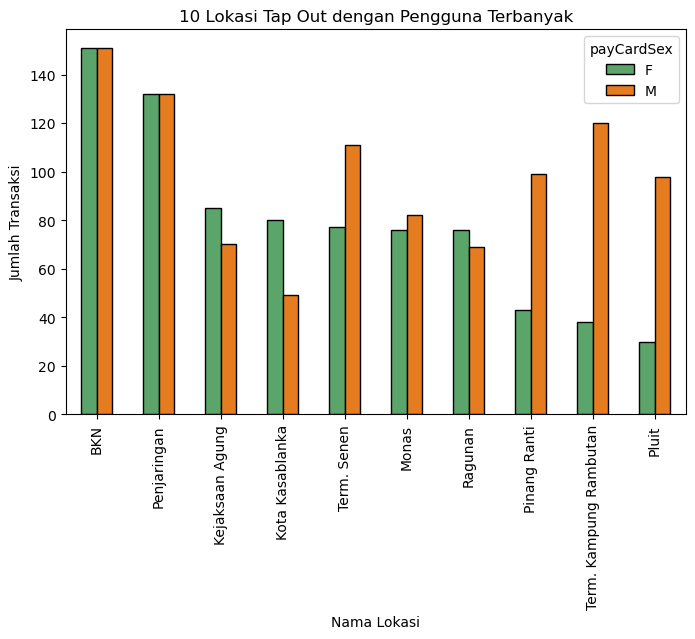

In [100]:
top_OutStops = (df['tapOutStopsName'].value_counts())
top_10_OutStops = top_OutStops[:10]
outList = list(top_10_OutStops.index)
dfTopOut = df.loc[df['tapOutStopsName'].isin(outList)]
df_ctOut=pd.crosstab(dfTopOut['tapOutStopsName'],df['payCardSex'])
df_ctOut.sort_values('F',ascending=False).plot(kind='bar',
                                              figsize=(8,5),
                                              title='10 Lokasi Tap Out dengan Pengguna Terbanyak',
                                              xlabel = 'Nama Lokasi',
                                              ylabel = 'Jumlah Transaksi',
                                              color = ['#5BA56A','#E57C20'],
                                              edgecolor = 'black')
plt.show()

10 Halte dengan transaksi Tap Out terbanyak yaitu halte BKN, Penjaringan, Kejaksaan Agung, Kota Kasablanka, Term. Senen, Monas, Ragunan, Pinang Ranti, Term. Kampung Rambutan, dan Pluit. Dari 10 halte tersebut, **5 halte dengan pengguna wanita terbanyak saat Tap Out adalah BKN, Penjaringan, Kejaksaan Agung, Kota Kasablanka, dan Term. Senen**.\
\
Pada kelima halte tersebut, dapat ditambahkan fasilitas berupa pemisahan jalur antrian bagi pengguna pria dan wanita, dan adanya petugas tambahan yang dapat memantau pengguna. Namun prioritas untuk penambahan fasilitas tersebut dapat lebih **diutamakan pada halte-halte Tap In**, karena pada halte Tap In pengguna akan mengantri untuk dapat naik ke kendaraan, sedangkan pada halte Tap Out pengguna biasanya akan langsung keluar dari halte setelah turun dari kendaraan.

Maka jawaban dari pertanyaan **Halte mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus wanita?**, yaitu halte:
- Penjaringan
- Seskoal
- Garuda Taman Mini
- Penggilingan
- Pejaten.

### 10 Halte untuk Tap In dan Tap Out Terbanyak oleh Lansia

Halte yang banyak digunakan oleh pengguna lansia penting untuk diketahui agar dapat memberikan fasilitas serta layanan khusus yang dapat memudahkan lansia untuk mobilisasi sehari-hari, dan memastikan keamanan serta kenyamanan para pengguna lansia.\
Analisis dilakukan untuk menjawab pertanyaan **Halte mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus lansia?**

<Axes: title={'center': 'Top 5 Elderly Tap In Stops'}, xlabel='Tap In Stops', ylabel='Total Tap Ins'>

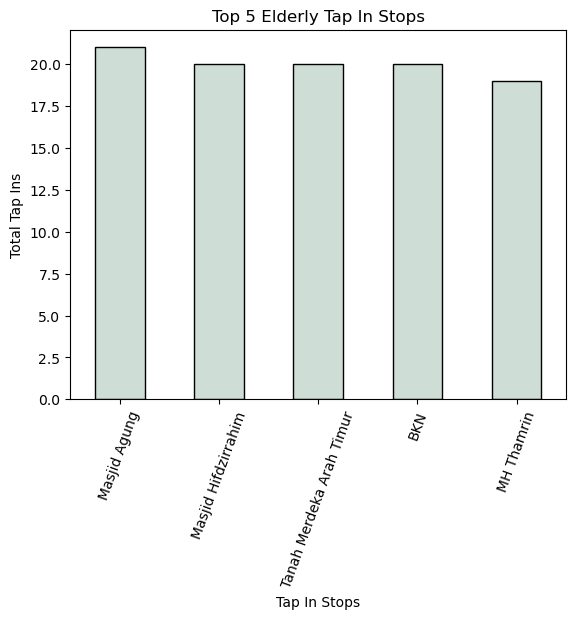

In [104]:
top_InStopsLansia = (df[df['golUsia']=='Lansia']['tapInStopsName'].value_counts())
top_5_InStopsLansia = top_InStopsLansia[:5]
top_5_InStopsLansia.plot(xlabel = 'Tap In Stops', ylabel = 'Total Tap Ins', kind='bar', edgecolor='black', color = '#CEDED6', rot=70, title = 'Top 5 Elderly Tap In Stops')

### Tap Out

<Axes: title={'center': 'Top 5 Elderly Tap Out Stops'}, xlabel='Tap Out Stops', ylabel='Total Tap Outs'>

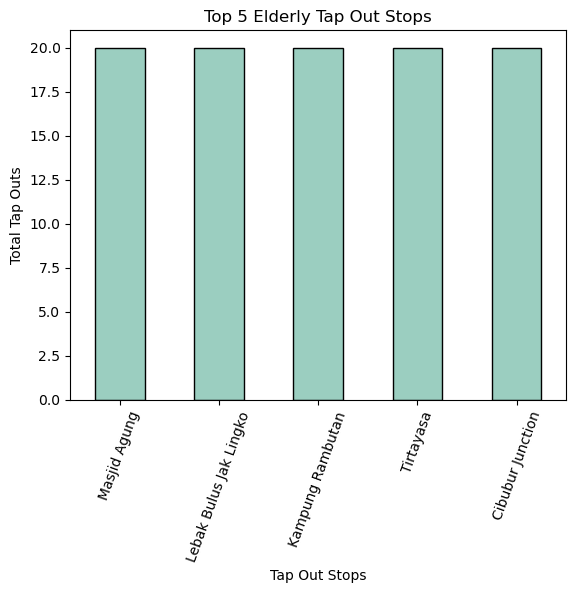

In [103]:
top_OutStopsLansia = (df[df['golUsia']=='Lansia']['tapOutStopsName'].value_counts())
top_5_OutStopsLansia = top_OutStopsLansia[:5]
top_5_OutStopsLansia.plot(xlabel = 'Tap Out Stops', ylabel = 'Total Tap Outs', kind='bar', edgecolor='black', color = '#9BCEC0', rot=70, title = 'Top 5 Elderly Tap Out Stops')

Pengguna lansia sendiri sebenarnya tidak terlalu banyak, hanya 2.04% dari seluruh transaksi dilakukan oleh lansia. Namun para pengguna lansia tetap perlu diberikan fasilitas dan layanan yang dapat menunjang. Pada 5 halte Tap In dengan transaksi oleh pengguna lansia terbanyak, yaitu halte **Masjid Agung, Masjid Hifdzirrahim, Tanah Merdeka Arah Timur, BKN, dan MH Thamrin**, dapat diberikan fasilitas dan layanan tambahan seperti akses ramp untuk mencapai halte, handrail baik di ramp maupun di halte untuk memudahkan lansia jika membutuhkan pegangan, kursi khusus lansia untuk menunggu kendaraan, serta petugas yang dapat membimbing dan memastikan pengguna lansia menaiki kendaraan dengan aman.\
\
Fasilitas serupa juga dapat ditambahkan pada halte **Lebak Bulus Jak Lingko, Kampung Rambutan, Tirtayasa, dan Cibubur Junction** sebagai halte Tap Out dengan transaksi oleh pengguna lansia terbanyak.

Maka jawaban dari pertanyaan **Halte mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus Lansia?**, yaitu halte:
- Masjid Agung
- Masjid Hifdzirrahim
- Tanah Merdeka Arah Timur
- BKN
- MH Thamrin
- Lebak Bulus Jak Lingko
- Kampung Rambutan
- Tirtayasa
- Cibubur Junction

## Mengetahui Koridor dengan Transaksi Terbanyak

Koridor merupakan rute atau trayek transjakarta. Koridor-koridor tertentu cenderung akan memiliki lebih banyak penumpang dibandingkan koridor lain, terutama jika koridor tersebut menghubungkan lokasi-lokasi strategis. Pertanyaan yang akan dijawab pada analisis ini yaitu **Koridor mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus wanita?**

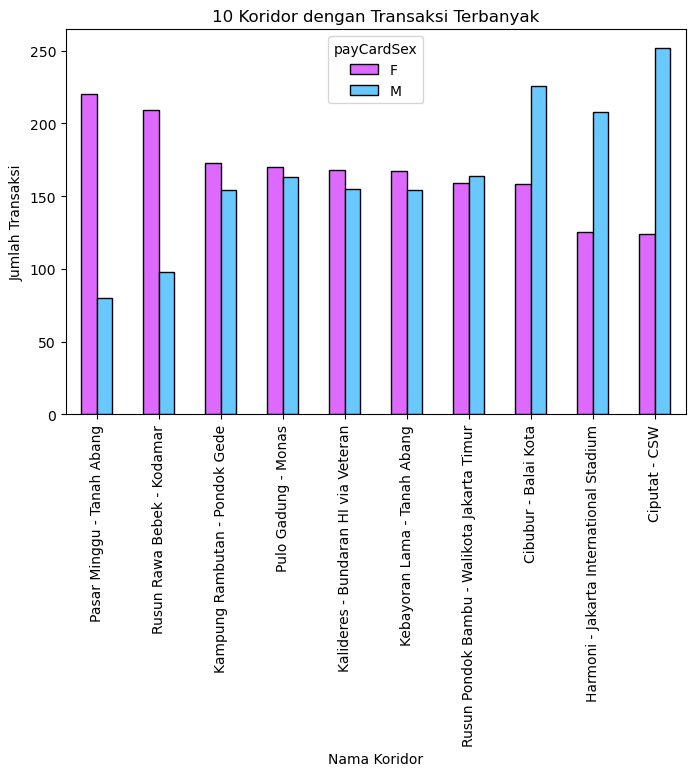

In [101]:
topCorr = (df['corridorName'].value_counts())
top10Corr = topCorr[:10]
corrList = list(top10Corr.index)
dfTopCorr = df.loc[df['corridorName'].isin(corrList)]
df_ctCorr=pd.crosstab(dfTopCorr['corridorName'],df['payCardSex'])
df_ctCorr.sort_values('F',ascending=False).plot(kind='bar',
                                              figsize=(8,5),
                                              title='10 Koridor dengan Transaksi Terbanyak',
                                              xlabel = 'Nama Koridor',
                                              ylabel = 'Jumlah Transaksi',
                                              color = ['#DD69FF','#69C9FF'],
                                              edgecolor = 'black')
plt.show()

10 koridor dengan transaksi terbanyak yaitu koridor Pasar Minggu - Tanah Abang, Rusun Rawa Bebek - Kodamar, Kampung Rambutan - Pondok Gede, Pulo Gadung-Monas, Kalideres-Bundaran HI via Veteran, Kebayoran Lama-Tanah Abang, Rusun Pondok Bambu-Walikota Jakarta Timur, Cibubur-Balai Kota, Harmoni-JIS, Ciputat-CSW. Dari 10 halte tersebut, **5 koridor dengan transaksi terbanyak oleh pengguna wanita adalah** :
- Pasar Minggu - Tanah Abang
- Rusun Rawa Bebek - Kodamar
- Kampung Rambutan - Pondok Gede
- Pulo Gadung-Monas
- Kalideres-Bundaran HI via Veteran.

Pada kelima koridor tersebut, dapat ditambahkan fasilitas berupa armada khusus wanita, gerbong khusus wanita, memastikan CCTV berfungsi dengan baik, dan jika dibutuhkan; petugas pada area non-khusus wanita untuk memastikan kenyamanan para pengguna. 

Pertanyaan yang akan dijawab pada analisis selanjutnya yaitu **Koridor mana saja yang perlu diproritaskan untuk diberi fasilitas dan layanan tambahan khusus lansia?**
\
Untuk mengetahui koridor yang perlu diprioritaskan, cukup menghitung koridor dengan jumlah transaksi oleh lansia terbanyak, tidak perlu mengacu pada koridor dengan transaksi terbanyak secara umum.

<Axes: title={'center': '5 Koridor dengan Transaksi Lansia Terbanyak'}, xlabel='Corridors', ylabel='Total User'>

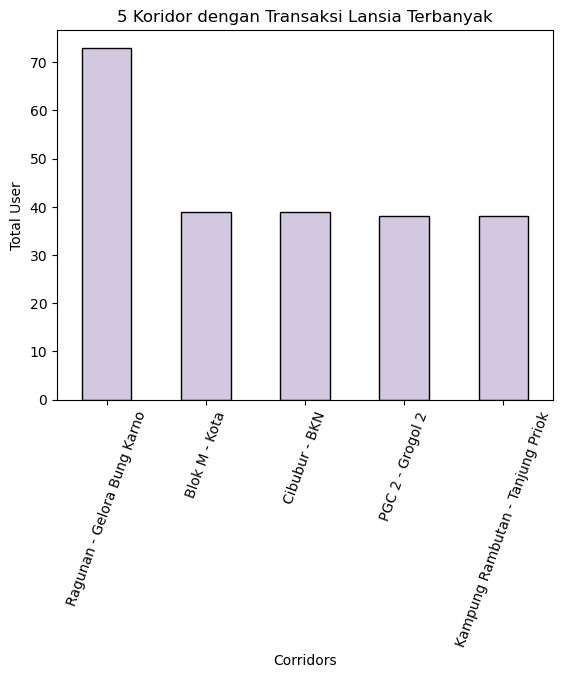

In [102]:
topCorrLansia = (df[df['golUsia']=='Lansia']['corridorName'].value_counts())
top5CorrLansia = topCorrLansia[:5]
top5CorrLansia.plot(xlabel = 'Corridors', ylabel = 'Total User', kind='bar', edgecolor='black', color = '#D2C8DF', rot=70, title = '5 Koridor dengan Transaksi Lansia Terbanyak')

Pada 5 koridor dengan transaksi oleh pengguna lansia terbanyak, yaitu koridor:
- Ragunan-GBK
- Blok M-Kota
- Cibubur-BKN
- PGC-Grogol 2
- Kampung Rambutan-Tanjung Priok

Pada kelima koridor tersebut, dapat diberikan fasilitas dan layanan tambahan seperti kursi khusus lansia, serta petugas yang dapat membimbing dan memastikan pengguna lansia naik dan turun kendaraan dengan aman.

## Analisis Tambahan

Selain peningkatan fasilitas dan layanan bagi kelompok pengguna tertentu seperti wanita dan lansia, data ini juga dapat memberikan *insight* tambahan mengenai peningkatan fasilitas dan layanan secara umum.

### Hari Kerja
Biasanya transportasi umum akan lebih banyak penggunanya saat hari kerja (Senin-Jumat), karena pengguna harus berangkat ke sekolah/kampus/kantor dibandingkan dengan akhir pekan (Sabtu-Minggu) dimana pengguna dapat memilih untuk beristirahat di rumah masing-masing.

In [106]:
wkdy = df.groupby('weekday').size().reset_index()
wkdy.rename(columns = {0:'Count'}, inplace = True)
wkdy

,weekday,Count
0,No,3464
1,Yes,32014


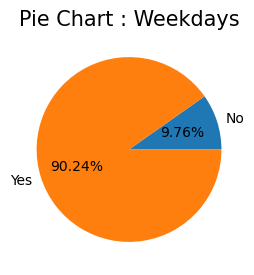

In [109]:
plt.figure(figsize=(10,3))
plt.pie(wkdy['Count'],labels=wkdy['weekday'],autopct='%.2f%%', textprops={'fontsize': 10})
plt.title('Pie Chart : Weekdays',size=15)
plt.show()

Pada pie chart sudah tampak jelas bahwa proporsi transaksi pada hari kerja lebih banyak daripada saat akhir pekan. Namun agar lebih yakin dapat dilakukan uji statistik 'Z-Test Single Population Proportion' dengan hipotesis:\
H0: proporsi transaksi saat weekday sama dengan atau kurang dari proporsi transaksi saat weekend.\
Ha: proporsi transaksi saat weekday lebih besar dari proporsi transaksi saat weekend.\
alpha = 0.05


In [121]:
countWkdy = df[df['weekday']=='Yes']['weekday'].count()
tot = df['weekday'].count()
z_stat, p_value = proportions_ztest(countWkdy, tot, 0.5, alternative = 'larger')
print('p-value adalah',p_value)

p-value adalah 0.0


Karena p-value < 0.05 maka berhasil menolak H0. Jadi **proporsi transaksi saat weekday lebih besar dari proporsi transaksi saat weekend.**

Mengetahui hal tersebut, perusahaan dapat menambah armada pada hari kerja agar dapat memfasilitasi pengguna dengan lebih baik. Pada akhir pekan, jumlah armada tidak perlu sebanyak armada pada hari kerja.

### Rush Hour
Transportasi umum akan cenderung lebih ramai (lebih banyak transaksi) pada jam-jam sibuk, yaitu jam berangkat sekolah/kantor pada pagi hari, dan jam pulang sekolah/kantor pada sore hari.

In [133]:
rsh = df.groupby('timeQuarter').size().reset_index()
rsh.rename(columns = {0:'Count'}, inplace = True)
rsh

,timeQuarter,Count
0,2,13909
1,3,3558
2,4,4017
3,5,11979
4,6,2015


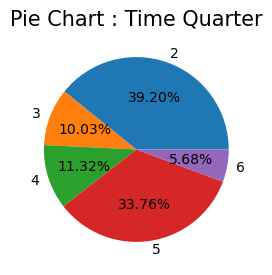

In [135]:
plt.figure(figsize=(10,3))
plt.pie(rsh['Count'],labels=rsh['timeQuarter'],autopct='%.2f%%', textprops={'fontsize': 10})
plt.title('Pie Chart : Time Quarter',size=15)
plt.show()

Pada pie chart sudah tampak bahwa proporsi transaksi pada rush hour (quarter 2 pukul 05:00-08:59 dan quarter 5 pukul 17:00-20:59) lebih banyak daripada jam-jam lain. Namun agar lebih yakin dapat dilakukan uji statistik 'Z-Test Single Population Proportion' dengan hipotesis:\
H0: proporsi transaksi saat rush hour (quarter 2 dan 5 pada 'timeQuarter') sama dengan atau kurang dari proporsi transaksi di luar rush hour.\
Ha: proporsi transaksi saat rush hour (quarter 2 dan 5 pada 'timeQuarter') lebih besar dari proporsi transaksi di luar rush hour.\
alpha = 0.05

In [146]:
countRsh = df[(df['timeQuarter']=='2') | (df['timeQuarter']=='5')]['timeQuarter'].count()
tot = df['timeQuarter'].count()
z_stat, p_value = proportions_ztest(countRsh, tot, 0.5, alternative = 'larger')
print('p-value adalah',p_value)

p-value adalah 0.0


Karena p-value < 0.05 maka berhasil menolak H0. Jadi **rush hour (quarter 2 dan 5 pada 'timeQuarter') lebih besar dari proporsi transaksi di luar rush hour**.

Mengetahui hal tersebut, perusahaan dapat menambah armada pada waktu-waktu tertentu agar dapat memfasilitasi pengguna yang ingin berangkat/pulang sekolah/kantor dengan lebih baik. Pada waktu di luar rush hour, jumlah armada tidak perlu sebanyak armada pada rush hour.

# Kesimpulan dan Rekomendasi
Dari analisis yang telah dilakukan, kesimpulan yang didapat mengenai transaksi Transjakarta:
* Pengguna Transjakarta memiliki rentang usia 11-77 tahun, dengan pengguna dewasa (19-59 tahun) sebagai pengguna dengan proporsi transaksi terbanyak.
* Transaksi yang dilakukan oleh lansia hanya mencakup sekitar 2% dari keseluruhan transaksi.
* Transaksi lebih banyak dilakukan oleh pengguna wanita daripada pria.
* Transaksi paling sering dilakukan pada hari Jumat.
* Transaksi pada hari kerja lebih banyak dibandingkan pada akhir pekan.
* Transaksi paling banyak terjadi pada jam sibuk/*rush hour* (05.00-09.00 dan 17.00-21.00)


**Rekomendasi**
1. Penambahan fasilitas khusus wanita di halte seperti antrian khusus wanita dan petugas yang dapat memantau kegiatan di halte dapat dimulai di halte: 
    * Penjaringan
    * Seskoal
    * Garuda Taman Mini
    * Penggilingan
    * Pejaten.
        * Setelah itu dapat menambah fasilitas serupa di halte: Rusun Kapuk Muara, Tendean, BNN LRT, BKN, dan Cibubur Junction.

2. Penambahan fasilitas khusus wanita di kendaraan seperti gerbong/armada khusus wanita, memastikan CCTV berfungsi dengan baik, dan jika dibutuhkan; petugas pada area non-khusus wanita untuk memastikan kenyamanan para pengguna dapat dimulai di koridor:
    * Pasar Minggu - Tanah Abang
    * Rusun Rawa Bebek - Kodamar
    * Kampung Rambutan - Pondok Gede
    * Pulo Gadung-Monas
    * Kalideres-Bundaran HI via Veteran
        * Setelah itu dapat menambah fasilitas serupa di halte: Kebayoran Lama-Tanah Abang, Rusun Pondok Bambu-Walikota Jakarta Timur, Cibubur-Balai Kota, Harmoni-JIS, Ciputat-CSW

        
3. Penambahan fasilitas khusus lansia di halte seperti akses ramp untuk mencapai halte, handrail baik di ramp maupun di halte untuk memudahkan lansia jika membutuhkan pegangan, kursi khusus lansia untuk menunggu kendaraan, serta petugas yang dapat membimbing dan memastikan pengguna lansia menaiki kendaraan dengan aman dapat dimulai di halte: 
    - Masjid Agung
    - Masjid Hifdzirrahim
    - Tanah Merdeka Arah Timur
    - BKN
    - MH Thamrin
    - Lebak Bulus Jak Lingko
    - Kampung Rambutan
    - Tirtayasa
    - Cibubur Junction

4. Penambahan fasilitas khusus lansia di dalam kendaraan seperti tempat duduk khusus lansia, serta petugas yang dapat membimbing dan memastikan pengguna lansia naik dan turun kendaraan dengan aman dapat dimulai di koridor:
    - Ragunan-GBK
    - Blok M-Kota
    - Cibubur-BKN
    - PGC-Grogol 2
    - Kampung Rambutan-Tanjung Priok

5. Perusahaan dapat menambah armada pada hari kerja dan *rush hour* (pukul 05.00-09.00 dan pukul 17.00-21.00) untuk memfasilitasi pengguna yang akan melakukan perjalanan dari/ke sekolah/kampus/kantor.

Dengan mempersempit halte dan koridor yang perlu diberikan fasilitas serta layanan tambahan berdasarkan target pengguna, diharapkan analisis ini bisa membantu perusahaan untuk mengarahkan anggaran penambahan fasilitas dan layanan agar lebih tepat sasaran, sehingga nantinya dapat meningkatkan kepuasan pengguna.